<a href="https://colab.research.google.com/github/daveyang-code/chess/blob/main/ChessViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install chess

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 149 kB 5.0 MB/s 


In [2]:
import chess
import chess.svg
from IPython.display import SVG

In [3]:
board = chess.Board('r1bqk1nr/ppp2ppp/1bnp4/8/2BPP3/2N2N2/P4PPP/R1BQ1RK1 b kq - 2 9')


In [4]:
white_pieces = []
black_pieces = []
for square in chess.SQUARES:
  if (board.color_at(square) ==  chess.WHITE):
    white_pieces.append(square)
  elif (board.color_at(square) == chess.BLACK):
    black_pieces.append(square)

In [5]:
white_attacks = {}
for piece in white_pieces:
  for attack in board.attacks(piece):
    if attack in white_attacks :
      white_attacks[attack] = white_attacks[attack] + 1
    else :
      white_attacks[attack] = 1

In [6]:
black_attacks = {}
for piece in black_pieces:
  for attack in board.attacks(piece):
    if attack in black_attacks :
      black_attacks[attack] = black_attacks[attack] - 1
    else :
      black_attacks[attack] = -1

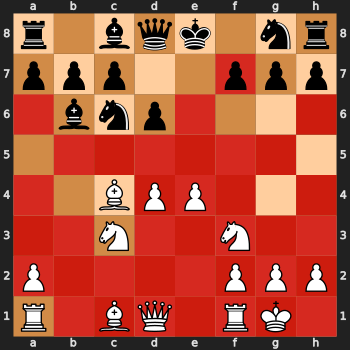

In [7]:
SVG(chess.svg.board(board,fill=dict.fromkeys(white_attacks, "#cc0000cc"),size=350))

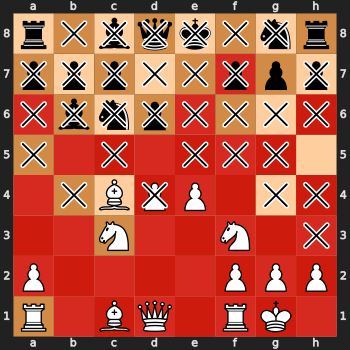

In [8]:
SVG(chess.svg.board(board,fill=dict.fromkeys(white_attacks, "#cc0000cc"), squares=black_attacks,size=350))

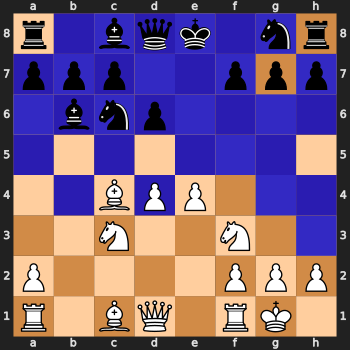

In [9]:
SVG(chess.svg.board(board,fill=dict.fromkeys(black_attacks, "#0000cccc"),size=350))

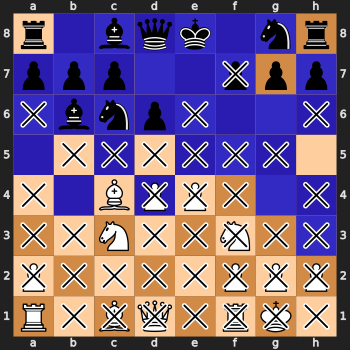

In [10]:
SVG(chess.svg.board(board,fill=dict.fromkeys(black_attacks, "#0000cccc"), squares = white_attacks, size=350))

In [11]:
all_attacks = {**white_attacks, **black_attacks}

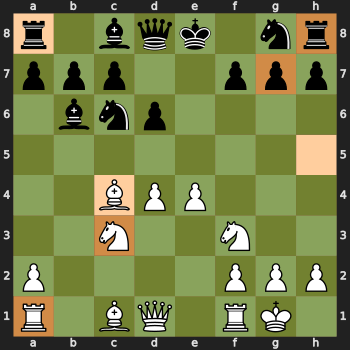

In [12]:
SVG(chess.svg.board(board,fill=dict.fromkeys(all_attacks, "#15781B80"),size=350))

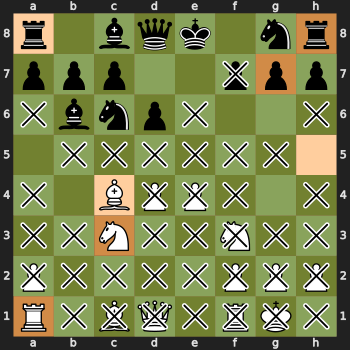

In [13]:
SVG(chess.svg.board(board,fill=dict.fromkeys(all_attacks, "#15781B80"), squares=white_attacks,size=350))

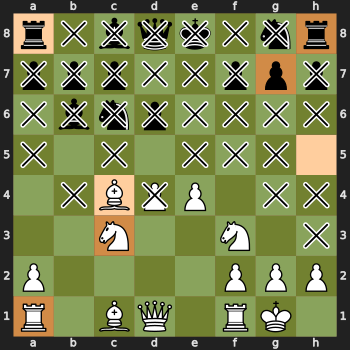

In [14]:
SVG(chess.svg.board(board,fill=dict.fromkeys(all_attacks, "#15781B80"), squares=black_attacks,size=350))

In [15]:
d = {x: "#0000cccc" for x in white_attacks}

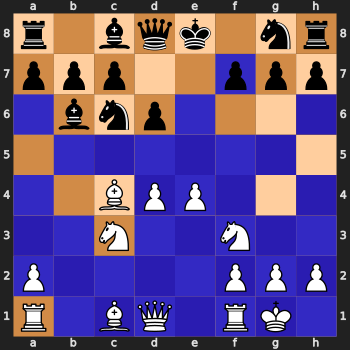

In [16]:
SVG(chess.svg.board(board,fill=d, size=350))

In [17]:
strengths = white_attacks.copy()
for key in black_attacks:
  if key in strengths:
    strengths[key] = strengths[key] + black_attacks[key]
  else :
    strengths[key] = black_attacks[key]

In [18]:
import numpy as np
from matplotlib import cm, colors

norm = colors.Normalize(vmin=min(strengths.values()), vmax=max(strengths.values()), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.RdBu)


In [19]:
cm_str = {}
for key in strengths:
  cm_str[key] = colors.to_hex(mapper.to_rgba(strengths[key]))

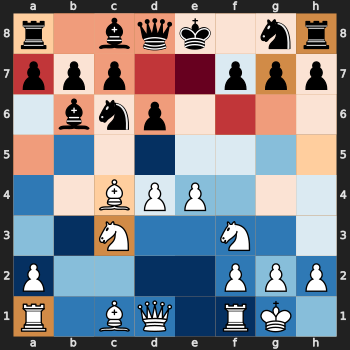

In [20]:
SVG(chess.svg.board(board,fill=cm_str, size=350))

In [21]:
norm = colors.Normalize(vmin=min(white_attacks.values()), vmax=max(white_attacks.values()), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.Blues)

In [22]:
w_str = {}
for key in white_attacks:
  w_str[key] = colors.to_hex(mapper.to_rgba(white_attacks[key]))

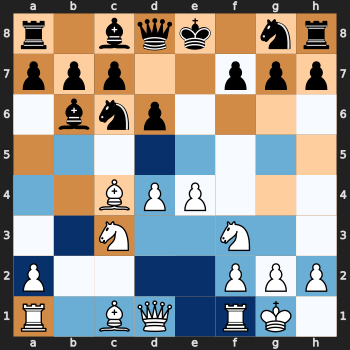

In [23]:
SVG(chess.svg.board(board,fill=w_str, size=350))

In [24]:
norm = colors.Normalize(vmin=min(black_attacks.values()), vmax=max(black_attacks.values()), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.Blues_r)
b_str = {}
for key in black_attacks:
  b_str[key] = colors.to_hex(mapper.to_rgba(black_attacks[key]))

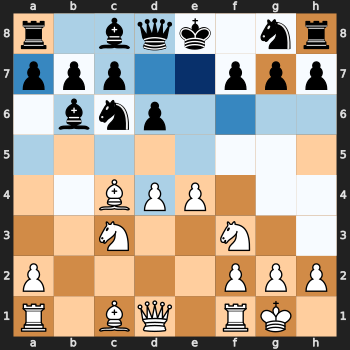

In [25]:
SVG(chess.svg.board(board,fill=b_str, size=350))

In [26]:
piece_values = {
    chess.PAWN: 1,
    chess.KNIGHT: 3,
    chess.BISHOP: 3,
    chess.ROOK: 5,
    chess.QUEEN: 9,
    chess.KING: 1
}

In [27]:
white_attacks = {}
for piece in white_pieces:
  for attack in board.attacks(piece):
    if attack in white_attacks :
      white_attacks[attack] = white_attacks[attack] + piece_values[board.piece_type_at(piece)]
    else :
      white_attacks[attack] = piece_values[board.piece_type_at(piece)]

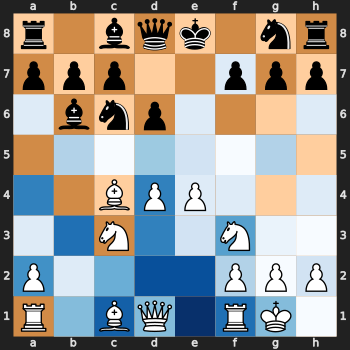

In [28]:
norm = colors.Normalize(vmin=min(white_attacks.values()), vmax=max(white_attacks.values()), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.Blues)
w_str = {}
for key in white_attacks:
  w_str[key] = colors.to_hex(mapper.to_rgba(white_attacks[key]))
SVG(chess.svg.board(board,fill=w_str, size=350))

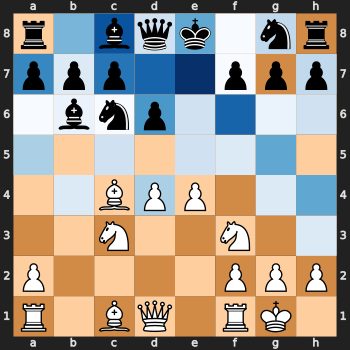

In [29]:
black_attacks = {}
for piece in black_pieces:
  for attack in board.attacks(piece):
    if attack in black_attacks :
      black_attacks[attack] = black_attacks[attack] + piece_values[board.piece_type_at(piece)]
    else :
      black_attacks[attack] = piece_values[board.piece_type_at(piece)]
norm = colors.Normalize(vmin=min(black_attacks.values()), vmax=max(black_attacks.values()), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.Blues)
b_str = {}
for key in black_attacks:
  b_str[key] = colors.to_hex(mapper.to_rgba(black_attacks[key]))
SVG(chess.svg.board(board,fill=b_str, size=350))

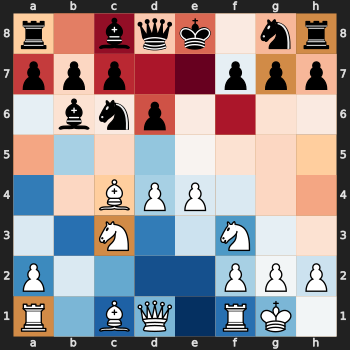

In [30]:
strengths = white_attacks.copy()
for key in black_attacks:
  if key in strengths:
    strengths[key] = strengths[key] - black_attacks[key]
  else :
    strengths[key] = -black_attacks[key]

norm = colors.Normalize(vmin=min(strengths.values()), vmax=max(strengths.values()), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.RdBu)

cm_str = {}
for key in strengths:
  cm_str[key] = colors.to_hex(mapper.to_rgba(strengths[key]))
SVG(chess.svg.board(board,fill=cm_str, size=350))

In [31]:
piece_values2 = {
    chess.PAWN: 9,
    chess.KNIGHT: 5,
    chess.BISHOP: 5,
    chess.ROOK: 3,
    chess.QUEEN: 1,
    chess.KING: 1
}

In [32]:
white_attacks = {}
for piece in white_pieces:
  for attack in board.attacks(piece):
    if attack in white_attacks :
      white_attacks[attack] = white_attacks[attack] + piece_values2[board.piece_type_at(piece)]
    else :
      white_attacks[attack] = piece_values2[board.piece_type_at(piece)]

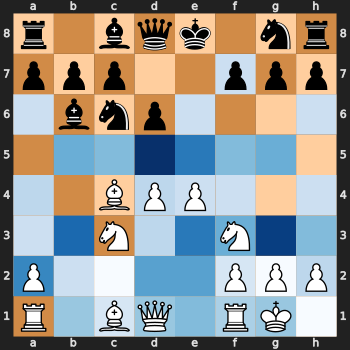

In [33]:
norm = colors.Normalize(vmin=min(white_attacks.values()), vmax=max(white_attacks.values()), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.Blues)
w_str = {}
for key in white_attacks:
  w_str[key] = colors.to_hex(mapper.to_rgba(white_attacks[key]))
SVG(chess.svg.board(board,fill=w_str, size=350))

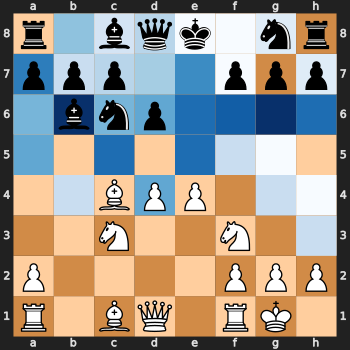

In [34]:
black_attacks = {}
for piece in black_pieces:
  for attack in board.attacks(piece):
    if attack in black_attacks :
      black_attacks[attack] = black_attacks[attack] + piece_values2[board.piece_type_at(piece)]
    else :
      black_attacks[attack] = piece_values2[board.piece_type_at(piece)]
norm = colors.Normalize(vmin=min(black_attacks.values()), vmax=max(black_attacks.values()), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.Blues)
b_str = {}
for key in black_attacks:
  b_str[key] = colors.to_hex(mapper.to_rgba(black_attacks[key]))
SVG(chess.svg.board(board,fill=b_str, size=350))

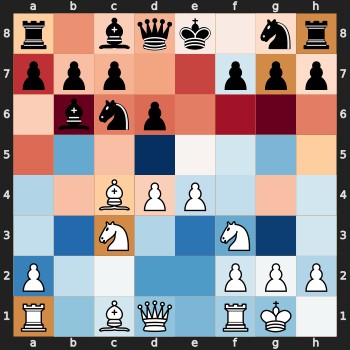

In [35]:
strengths = white_attacks.copy()
for key in black_attacks:
  if key in strengths:
    strengths[key] = strengths[key] - black_attacks[key]
  else :
    strengths[key] = -black_attacks[key]

norm = colors.Normalize(vmin=min(strengths.values()), vmax=max(strengths.values()), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.RdBu)

cm_str = {}
for key in strengths:
  cm_str[key] = colors.to_hex(mapper.to_rgba(strengths[key]))
SVG(chess.svg.board(board,fill=cm_str, size=350))